In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Veri İçe Aktarma ve Ufak Bir Bakış**

In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/diyabetik_retinopi_veri_seti /train.csv',sep=',')

In [ ]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


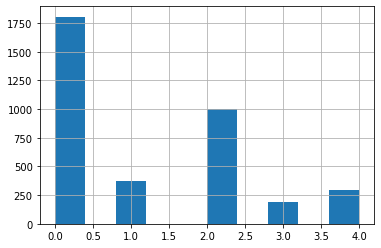

In [ ]:
df['diagnosis'].hist()

In [ ]:
df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [ ]:
import os 

In [ ]:
#Klasör içindeki bütün dosya isimlerini almak 
files=os.listdir('/content/drive/MyDrive/diyabetik_retinopi_veri_seti /train_images')
files.sort()
files[:5]

['000c1434d8d7.png',
 '001639a390f0.png',
 '0024cdab0c1e.png',
 '002c21358ce6.png',
 '005b95c28852.png']

In [ ]:
len(files)

3662

In [ ]:
import cv2

In [ ]:
img_list=[]
for i in files[:20]:
  image=cv2.imread('/content/drive/MyDrive/diyabetik_retinopi_veri_seti /train_images//' + i)
  image=cv2.resize(image,(400,400))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  img_list.append(image)

In [ ]:
len(img_list)

20

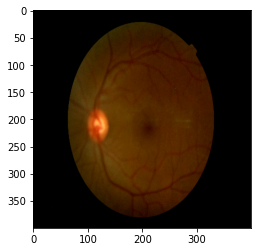

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img_list[4])

## Siyah Alanların **Tespiti**

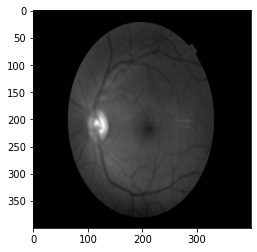

In [ ]:
kopya=img_list[4].copy()
kopya=cv2.cvtColor(kopya,cv2.COLOR_RGB2GRAY)
plt.imshow(kopya,cmap='gray')

In [ ]:
kopya.shape

(400, 400)

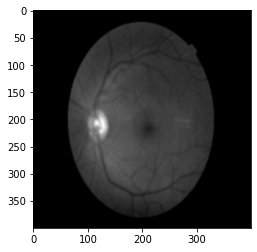

In [ ]:
blur=cv2.GaussianBlur(kopya,(5,5),0) #çekirdeğe eklenecek sigmax ve sigmay değerlerinin standart sapma değerleri o olarak girdigi için 5 5 lik çekirdek otomatik olarak hesaplanacak
plt.imshow(blur,cmap='gray')  

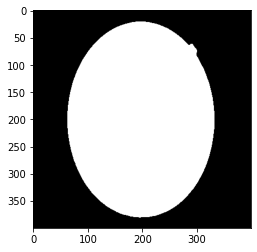

In [ ]:
thresh=cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]
plt.imshow(thresh,cmap='gray')

Kontur

In [ ]:
#cv2.RETR_EXTERNAL SADECE KENARLARI AL ŞEKLİMİZ DAİRE OLDUĞU İÇİN CHAIN_APPROX_NONE veya CHAIN_APPROX_SIMPLE kullanılabilir SIMPLE köşegenlerde köşe koordinatlarını alıyor sadece 
kontur=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#sadece koordinatları al hiyararşi sırasını alma 
kontur=kontur[0][0]


In [ ]:
kontur

array([[[188,  21]],

       [[187,  22]],

       [[181,  22]],

       [[180,  23]],

       [[177,  23]],

       [[176,  24]],

       [[173,  24]],

       [[172,  25]],

       [[169,  25]],

       [[168,  26]],

       [[166,  26]],

       [[165,  27]],

       [[163,  27]],

       [[162,  28]],

       [[160,  28]],

       [[159,  29]],

       [[158,  29]],

       [[157,  30]],

       [[155,  30]],

       [[154,  31]],

       [[153,  31]],

       [[152,  32]],

       [[151,  32]],

       [[150,  33]],

       [[149,  33]],

       [[148,  34]],

       [[147,  34]],

       [[146,  35]],

       [[145,  35]],

       [[143,  37]],

       [[142,  37]],

       [[141,  38]],

       [[140,  38]],

       [[138,  40]],

       [[137,  40]],

       [[135,  42]],

       [[134,  42]],

       [[131,  45]],

       [[130,  45]],

       [[126,  49]],

       [[125,  49]],

       [[109,  65]],

       [[109,  66]],

       [[104,  71]],

       [[104,  72]],

       [[1

In [ ]:
#hala bir boyur fazlam var ortadaki 1 
kontur.shape

(452, 1, 2)

In [ ]:
#fazla boyuttan kurtulalım
kontur=kontur[:,0,:]
kontur.shape

(452, 2)

In [ ]:
kontur

array([[188,  21],
       [187,  22],
       [181,  22],
       [180,  23],
       [177,  23],
       [176,  24],
       [173,  24],
       [172,  25],
       [169,  25],
       [168,  26],
       [166,  26],
       [165,  27],
       [163,  27],
       [162,  28],
       [160,  28],
       [159,  29],
       [158,  29],
       [157,  30],
       [155,  30],
       [154,  31],
       [153,  31],
       [152,  32],
       [151,  32],
       [150,  33],
       [149,  33],
       [148,  34],
       [147,  34],
       [146,  35],
       [145,  35],
       [143,  37],
       [142,  37],
       [141,  38],
       [140,  38],
       [138,  40],
       [137,  40],
       [135,  42],
       [134,  42],
       [131,  45],
       [130,  45],
       [126,  49],
       [125,  49],
       [109,  65],
       [109,  66],
       [104,  71],
       [104,  72],
       [101,  75],
       [101,  76],
       [ 99,  78],
       [ 99,  79],
       [ 97,  81],
       [ 97,  82],
       [ 95,  84],
       [ 95,

In [ ]:
#Uç noktaların koordinatlarına erişelim
#en büyük x değerinin indexini bulmak
max_x=kontur[:,0].argmax()
#en büyük x değeri koordinatlarını getirmek getirmek
kontur[max_x]

array([332, 218], dtype=int32)

In [ ]:
 #en küçük x değeri indexi
 min_x=kontur[:,0].argmin()
 #değeri çekmek
 kontur[min_x]

array([ 63, 185], dtype=int32)

In [ ]:
#aynı işlemleri x ve y için toplu şekilde yapalım
sol=tuple(kontur[kontur[:,0].argmin()])
sag=tuple(kontur[kontur[:,0].argmax()])
ust=tuple(kontur[kontur[:,1].argmin()])
alt=tuple(kontur[kontur[:,1].argmax()])

In [ ]:
sol,sag,ust,alt

((63, 185), (332, 218), (188, 21), (194, 380))

In [ ]:
x1=sol[0]
y1=ust[1]
x2=sag[0]
y2=alt[1]

In [ ]:
x1,y1,x2,y2

(63, 21, 332, 380)

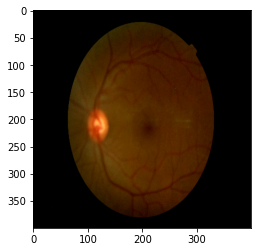

In [ ]:
orijinal=img_list[4].copy()
plt.imshow(orijinal)

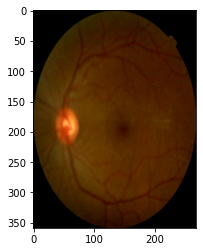

In [ ]:
#Kırpma işlemi
crop_ilk=orijinal[y1:y2,x1:x2]
plt.imshow(crop_ilk)

In [ ]:
crop_ilk.shape

(359, 269, 3)

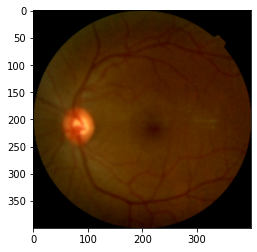

In [ ]:
crop_ilk=cv2.resize(crop_ilk,(400,400))
plt.imshow(crop_ilk)

In [ ]:
"""Görüntünün uç sınırlarında modelimizin ögrenebileceği değerli bir bilgi yok ve hala 
köşelerde siyah bölge bulunmakta bunun için bir x ve y değerleri üzerinden bir 
standart sapma değeri belirliyoruz
"""

x=int(x2-x1)*4//100 #4le çarpıp 100 e bölme kısmı kafadan yaptığımız bir şey 
y=int(y2-y1)*5//100

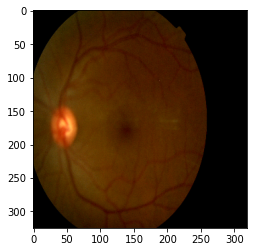

In [ ]:
#Bulunan x ve y sapmalarını piksellerden çıkartalım
crop_son=orijinal[ y1+y : y2-y , x1+x : 2-x]
plt.imshow(crop_son)

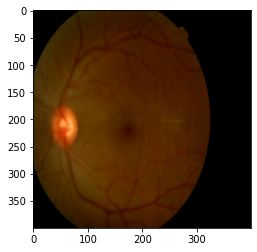

In [ ]:
#Tekrar 400'e 400 koordinatlarına getirelim 
crop_son=cv2.resize(crop_son,(400,400))
plt.imshow(crop_son)


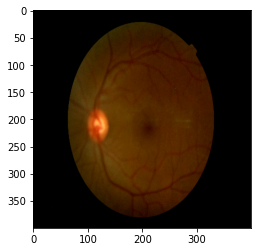

In [ ]:
#Kırpmadan önceki resmide görüntüleyelim
plt.imshow(orijinal)

# **CLAHE -Kontrast Limitli Adaptif Histogram Eşitleme** 

In [ ]:
"""
İlk olarak görüntü üzerinde işlem yapabilmek için görüntünün parlarklık değerlerini içeren siyah-beyaz hali lazım
Renk kanalını LAB renk haritasına çevireceğiz L=PARLAKLIK(siyah-beyaz) A=Yeşil-Kırmızı B=Mavi-Sarı katmanları içeriyor 

"""
lab=cv2.cvtColor(crop_son,cv2.COLOR_RGB2LAB)

In [ ]:
#Burada 3 katman var bunun için ayırma yapacağız
lab.shape

(400, 400, 3)

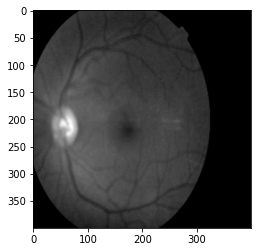

In [ ]:
l,a,b=cv2.split(lab)
plt.imshow(l,cmap='gray')

In [ ]:
#Histogram grafiği oluşturma 
#Önce düzleştirelim

düz=l.flatten()
düz.shape

(160000,)

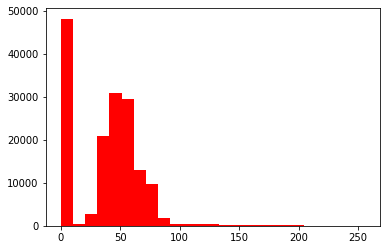

In [ ]:
#Pikselle tek bir bölgeye yoğunlaştığı için normal histogram eşitleme kullanılamaz
plt.hist(düz,25,[0,256],color='r')
plt.show()

In [ ]:
#clahe=cv2.createCLAHE(Kontrast limiti,Çerçeve boyutu)
#clahe.apply(görüntü)
#Konstrat limiti koymak kumlanmanın önüne geçiyor görüntü içinde dönen karede(kernel) bulduğu herhangi bir pikselin kontrastı sınırın üzerine çıkarsa bu bulduğu değeri yandaki komşu piksellere dağıtır 

clahe=cv2.createCLAHE(clipLimit=7.0,tileGridSize=((8,8)))
cl=clahe.apply(l)

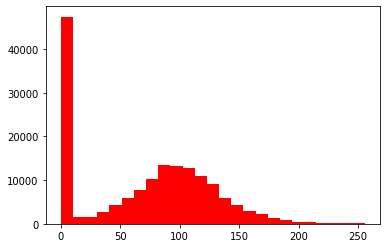

In [ ]:
#Görüldüğü konstrat sınırını aşan pikselerin konstratı yandaki piksellere dağıtılmış
plt.hist(cl.flatten(),25,[0,256],color='r')
plt.show()

İki görüntüyü karşılaştıralım

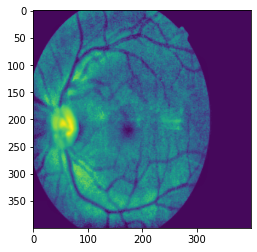

In [ ]:
plt.imshow(cl)

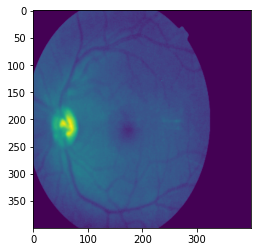

In [ ]:
plt.imshow(l)

In [ ]:
#Yeni parlaklık katmanını daha önce ayırdığımız a ve b katmanı ile birleştirelim 
limg=cv2.merge((cl,a,b))

In [ ]:
son=cv2.cvtColor(limg,cv2.COLOR_LAB2RGB)

Son görüntüleri karşılaştıralım

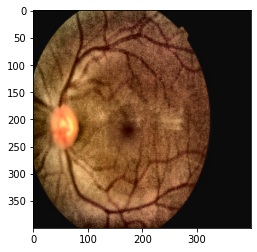

In [ ]:
plt.imshow(son)

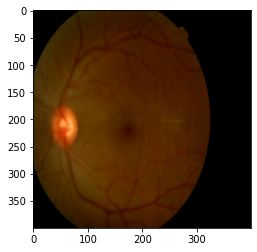

In [ ]:
plt.imshow(crop_son)

Her ne kadar konstrat limiti kullansakta görüntü üzerinde hala bir kumlanma mevcut bunu azaltmaya çalışacağız.
Kumlanma modelin başarısını olumsuz etkiler

# **Median Filtre**

Median filtre özellikle kumlanma olan görüntülerde kullanılır.

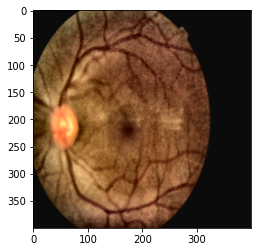

In [ ]:
#cv2.medianBlur(görüntü,çekirdek boyutu(tek sayı))
med_son=cv2.medianBlur(son,3)
plt.imshow(med_son)

Modelimizin göz içerisindeki kanamaları daha iyi tespit edebilmesini sağlamak için gözün içerisindeki kanayan yada kanamaya benzeyen bölümlerin değerini arttıracak bir maskeleme işlemi yapacağız

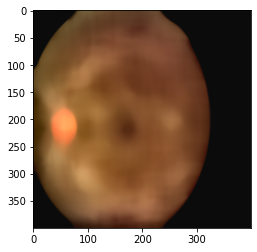

In [ ]:
arka_plan=cv2.medianBlur(son,37)
plt.imshow(arka_plan)

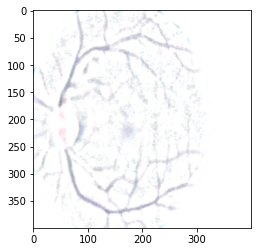

In [ ]:
maske=cv2.addWeighted(med_son,1,arka_plan,-1,255)  
plt.imshow(maske)

Bitwise Kullanımı


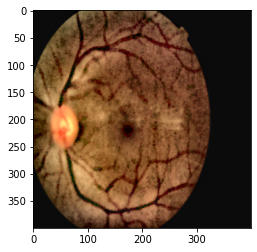

In [ ]:
son_img=cv2.bitwise_and(maske,med_son)
plt.imshow(son_img)


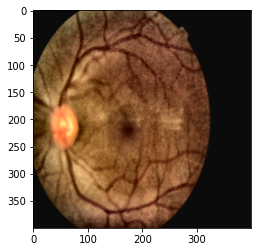

In [ ]:
#Bitwise öncesi 
plt.imshow(med_son)

# **Veri Önişleme Kodlarının Bütün Resimler İçin Uygulanması**

In [ ]:
#Ram yetmediği için resim boyutunu 400 400 den 300 300 e indiriyorum

import cv2 
img_list=[]
#Kodun ilerlemesini görmek için bir kütüphane kullanacağız
from tqdm import tqdm_notebook as tqdm
#İçe aktarılan kütüphane aşağıda kullanıldı
for i in tqdm(files):

  image=cv2.imread('/content/drive/MyDrive/diyabetik_retinopi_veri_seti /train_images//' + i)
  image=cv2.resize(image,(300,300))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  kopya=image.copy()
  kopya=cv2.cvtColor(kopya,cv2.COLOR_RGB2GRAY)
  blur=cv2.GaussianBlur(kopya,(5,5),0)
  thresh=cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]
  kontur=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  kontur=kontur[0][0]
  kontur=kontur[:,0,:]
  x1=tuple(kontur[kontur[:,0].argmin()])[0]
  x2=tuple(kontur[kontur[:,0].argmax()])[0]
  y1=tuple(kontur[kontur[:,1].argmin()])[1]
  y2=tuple(kontur[kontur[:,1].argmax()])[1]
  x=int(x2-x1)*4//50
  y=int(y2-y1)*5//50
  kopya2=image.copy()
  #Bazı resimler kendiliğinden kırpılmış olabilir onları kırpma işlemine dahil etmemek için aşağıdaki if bloğunu koyuyorum
  if x2-x1>100 and y2-y1>100:
    kopya2=kopya2[ y1+y:y2-y , x1+x:x2-x]
    kopya2=cv2.resize(kopya2,(300,300))
  lab=cv2.cvtColor(kopya2,cv2.COLOR_RGB2LAB)
  l,a,b=cv2.split(lab)
  clahe=cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8)))
  cl=clahe.apply(l)
  limg=cv2.merge((cl,a,b))
  son=cv2.cvtColor(limg,cv2.COLOR_LAB2RGB)
  med_son=cv2.medianBlur(son,3)
  arka_plan=cv2.medianBlur(son,37)
  maske=cv2.addWeighted(med_son,1,arka_plan,-1,255)
  son_img=cv2.bitwise_and(maske,med_son)
  img_list.append(son_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/3662 [00:00<?, ?it/s]

Ufak bir toplu görselleştirme

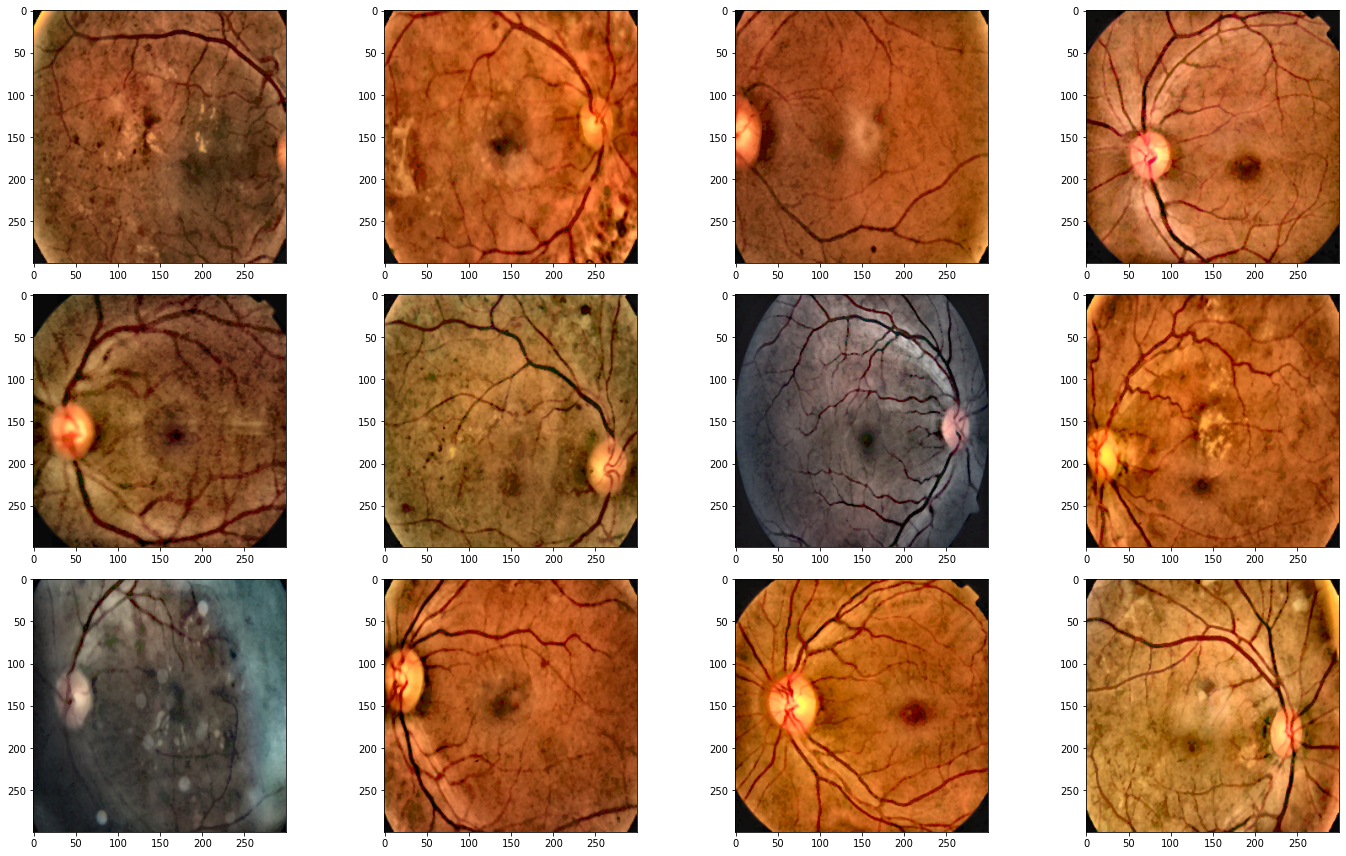

In [ ]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(20,12))
for i in range(12):
  img=img_list[i]
  fig.add_subplot(3,4,i+1)
  plt.imshow(img)
plt.tight_layout()

# **Sınıflardırma Verileri Üzerinnde İşlemler**

In [ ]:
y_train=pd.get_dummies(df['diagnosis']).values
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
import numpy as np

Şuan 4.derece retinopati için [0,0,0,0,1] böyle bir dizemiz var.4.derece retinopati 1,2 ve 3. derece retinopati bulgularınıda içerdiği için dizemiz şöyle olmalı [1,1,1,1,1] aynı durum diğer sınıflar içinde geçerli.

In [ ]:
y_train_son=np.ones(y_train.shape,dtype='uint8')
y_train_son

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
#Son satır her türlü aynı kalacağı için bu işlem yapılıyor
y_train_son[:,4]=y_train[:,4]
y_train_son

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       ...,
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]], dtype=uint8)

In [ ]:
for i in range(3,-1,-1):
  y_train_son[:,i]=np.logical_or(y_train[:,i],y_train_son[:,i+1])


In [ ]:
y_train_son

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       ...,
       [1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

In [ ]:
x_train=np.array(img_list)
x_train.shape

(3662, 300, 300, 3)

In [ ]:
y_train_son.shape

(3662, 5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,
                                             y_train_son,
                                             test_size=0.15,
                                             random_state=42,
                                             shuffle=True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)#Görüntülerin yatay ve dikey halleride eğitime girebilecek
#Normalizasyon yapmadık çünkü EfficentNet modeli bu işlemi kendiliğinden yaptığı için bu işlemi şuan yapmıyoruz
#Batch_size ayarlama 
data_generator=datagen.flow(x_train,y_train,batch_size=2,seed=2020)

In [ ]:
! pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from efficientnet.keras import EfficientNetB5

In [ ]:
"""
include_top True olursa sondaki dense layer yani sınıflandırma katmanını al false olursa alma.
Almadığımız için evrişimli katmanlar özellik çıkartıcı olarak çalışır.Yoğun katmanlar sınıflandırmak için kalıpları 
(kenar,köşe,kıvrım vb.) yorumlar ve sınıflandırma yapar
"""
örnek_model2=EfficientNetB5(include_top=False)

In [ ]:
from keras.models import Sequential
from keras import layers
#Sequential katmanların sıralı olması demek 
model=Sequential()
#transfer learning yapacağımız modeli ekleyelim
model.add(EfficientNetB5(weights='imagenet',include_top=False,input_shape=(300,300,3)))#weights imagenet veri seti üzerinde eğitilmiş ağırlıklar 
"""
Normalde modelimiz son kısma geldiğinde flatten kullanılarak bir vektör haline çevrilir fakar efficientnette flatten kullanılmıyor 
sebebide şu parametreler çoğaldıkça en sondaki tamamen bağlı katmanda çok fazla ağırlık meydana geliyor bu ağırlıklar hem bilgisayarı yoruyor 
hem de modelin overfit olma ihtimalini arttırıyor bu overfit verilerin standartizasyonuyla veya dropout yapılarak çözülebilen bir overfit değil bu nedenle efficientnet te GlobalAveragePooling2D 
kullanılıyor.
  GlobalAveragePooling2D
--Parametreleri Azaltır 
--Overfitsorununu minimalize eder 
--Her kanalın ortalama değerini alır 
--Veri boyutu azalır(Fakat veri kaybı olur,
elinizdeki veri setine bağlı olarak modeli olumlu yada olumsuz etkileyebilir )
  Flatten
  -Parametre sayısı çoktur
  -Overfit ihtimali yüksek 
  -Görüntüyü direkt vektöre çevirir (en,boy,renk)-->> (en*boy*renk)
  -Veri korunur(Elinizdeki veriye bağlı olarak faydalı da olabilir,fakat bilgisayarı gereksiz de yorabilir)
--Efficient yerine başka bir model ile transferlearning yapmak istersek çoğunlukla flatten kullanılıyor 
fakat son yıllarda GlobalAveragePooling2D neredeyse tüm modellerde kullanılmaya başlandı
"""
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5,activation='sigmoid'))#softmax yerine sigmoid kullanıldı  
"""
Yukarda sigmoid kullanılmasının sebebi multi-label bir sınıflandırma yaprığımızdan dolayı.
Multi-Class --> softmax olasılığı en büyük çıktı alınır
Multi-Label --> sigmoid  birden fazla çıktısı olabilir görüntünün ne olduğundan çok içinde ne olup olmadığına odaklanır
"""


'\nYukarda sigmoid kullanılmasının sebebi multi-label bir sınıflandırma yaprığımızdan dolayı.\nMulti-Class --> softmax olasılığı en büyük çıktı alınır\nMulti-Label --> sigmoid  birden fazla çıktısı olabilir görüntünün ne olduğundan çok içinde ne olup olmadığına odaklanır\n'

Hiperparametere


In [ ]:
from keras.optimizers import Adam 
#KAYIP FONKSİYONU olarak categorical_crossentropy  girmiyoruz çünkü aktivasyon fonksiyonu olarak sigmoid kullandık 
#lr =learning_rate ---> ne kadar büyük ise model o kadar hızlı öğrenilir.Hızlı öğrenmesi iyi fakat bazen çok hızlı öğrendiğği için overfit olabilir 
#Burada kilit nokta kayıp fonksiyonu eğer aktivasyon sigmoid olmasına rağmen categorical_crossentropy kullansaydık akticasyonlar kayıp fonksiyonu uyumlu olmayacağı için kayıp yüksek çıkacaktı 
#Bu da modeli yanlış yorumlamamıza neden olacaktı 
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.00005),metrics=['accuracy'])

#learning rate'i model eğitilirken otomatik olarak arttırılıp azaltılması 
from keras.callbacks import  ReduceLROnPlateau
#Model eğitilirken kayıp fonksiyonu eğer bir süreden sonra hiç değişmemeye başlarsa modelin overfit olmaması için modelin öğrenme katsayısını düşüren bir kod yazacağız 
#monitor izlenmesi gereken değer patiance kaç turda aynı değeri verdiyse lr yi düşür  ,
#factor yeni öğrenme katsayısı  öğrenme katsayısının yüzde 25ine eşit olacak 
#min_lr en az olabilecek lr ---Bunu belirlemek önemli çünkü eğer lr sürekli düşerse model bir süre sonra öğrenemez
lr=ReduceLROnPlateau(monitor='val_loss',
                     patience=3,
                     verbose=1,
                     mode='auto',
                     factor=0.25,
                     min_lr=0.000001)
#bu kodu modeli eğitime sokarken ekleyeceğiz

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#ilk olarak eğitime sokulacak veri girilir 
#steps_per_epoch her tur başına döndürülecek tensor grupları sayısı normalde şöyle belirlenir
#modele sokulan görüntü sayısı kerasın veri oluşturucusu kullaılırken girilen batch_Size a bölününce bulunur 
#Şuan modelin eğitimi daha iyi gözüksün diye daha düşük bir değer girildi 
history=model.fit_generator(data_generator,
                            steps_per_epoch=1000,
                            epochs=15,
                            validation_data=(x_val,y_val),
                            callbacks=[lr])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


1000/1000 [==============================] - 235s 192ms/step - loss: 0.3551 - accuracy: 0.9690 - val_loss: 0.2153 - val_accuracy: 1.0000 - lr: 5.0000e-05
Epoch 2/15
1000/1000 [==============================] - 188s 188ms/step - loss: 0.2194 - accuracy: 0.9810 - val_loss: 0.1781 - val_accuracy: 0.9327 - lr: 5.0000e-05
Epoch 3/15
1000/1000 [==============================] - 192s 192ms/step - loss: 0.1773 - accuracy: 0.9680 - val_loss: 0.1481 - val_accuracy: 0.9564 - lr: 5.0000e-05
Epoch 4/15
1000/1000 [==============================] - 193s 192ms/step - loss: 0.1625 - accuracy: 0.9530 - val_loss: 0.1425 - val_accuracy: 0.9055 - lr: 5.0000e-05
Epoch 5/15
1000/1000 [==============================] - 188s 188ms/step - loss: 0.1466 - accuracy: 0.9495 - val_loss: 0.1744 - val_accuracy: 1.0000 - lr: 5.0000e-05
Epoch 6/15
1000/1000 [==============================] - 188s 188ms/step - loss: 0.1383 - accuracy: 0.9620 - val_loss: 0.1328 - val_accuracy: 0.9891 - lr: 5.0000e-05
Epoch 7/15
1000/1000 